# Homework 3

DUE DEC 1st at 11:59 PM


## Problem 1

In this problem, you will implement a simple feed-forward neural network using PyTorch, a straight-forward and simple-to-pickup framework for quickly prototyping deep learning model. 

PyTorch provides 2 powerful things. First, a nice data structure called Tensor (basically a matrix, similar to Numpy ndarray). Tensor is optimized for matrix calculation and can be loaded to a GPU. Tensor is also implemented so that it's easy to calculate and pass back chains of gradients, which is extremely useful for backpropagation on neural network. Second, a nice inner mechanism called Autograd that nicely map variables involved a chain of calculations and efficiently calculate their gradients via the chain rule when needed. Read more here: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95  

You will train and evaluate the model on a simple dataset for classifying seeds. The dataset has 7 features and 3 labels. Refer to the example from the discussion session if needed. 

**In this problem, you are given a good amount of freedom in tweaking your choices in designing the network. As long as it's still a feed-forward network, it's fine. Accuracy does not matter as long as it's reasonable (like above 80%) but do try to achieve a high accuracy.**

(Optional): the dataset provided to you is very simple. Instead, you can challenge yourself by trying more difficult datasets. Some datasets that you can loaded directly using PyTorch:
- MNIST (Most famous dataset for getting into Deep Learning)
- Fashion-MNIST
- Kuzushiji-MNIST 

The datasets are available at https://pytorch.org/docs/stable/torchvision/datasets.html. You will get the same grade no matter what dataset you use. 

### Part a
Firstly, load and inspect the dataset from "seeds_dataset.csv". Split them into a train set (90%) and a test set (10%). You should be quite comfortable with these operations by now. 

In [12]:
import torch
from torch.autograd import Variable
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


data = pd.read_csv('seeds_dataset.csv')
X = data.iloc[:,:-1].to_numpy(dtype=np.float32)
y = data.iloc[:,-1].astype("category").cat.codes.to_numpy(dtype=np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Part b 
Create a Python class for our neural network model. The network should have 1 input layer, at least 1 hidden layer, and 1 output layer. You are free to choose the size and the number of hidden layers (it may affect the performance so try tweaking around a bit), and the activation function (or no activation at all).

Some popular activation functions that you can try:
- Sigmoid (torch.sigmoid)
- ReLU (torch.relu)
- Tanh (torch.tanh)

In [5]:
a = torch.tensor([3.], requires_grad=True)
b = torch.tensor([5.], requires_grad=True)

In [6]:
c = a**2 + b

In [7]:
c.backward()

In [8]:
a.grad #dc/da

tensor([6.])

In [9]:
b.grad #dc/db

tensor([1.])

In [16]:


class simple_network(torch.nn.Module):
    
    def __init__(self):
        super(simple_network,self).__init__()
        self.layer1 = torch.nn.Linear(in_features=7, out_features=40)
        self.layer2 = torch.nn.Linear(in_features=40, out_features=40)
        self.outputlayer = torch.nn.Linear(in_features=40, out_features=3)
        
    def forward(self,x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.outputlayer(x)
        return x
    # Create the network class by filling in this block of code

### Part c 
Train the network using the train dataset. You are free to choose any suitable optimizer and loss function provided by PyTorch (or you can just use SGD optimizer and CrossEntropyLoss like we did in the discussion session for simplicity). After each epoch, record the current loss and the current accuracy. The current accuracy is obtained by evaluating the model on the train dataset. 

Some optimizers that you can try:
- SGD
- Adagrad
- Adam

https://pytorch.org/docs/stable/optim.html

In [33]:
epochs = 1000
learning_rate = 0.01
batch_size = 32

arr_loss = []
arr_epochs = []
arr_accuracy = []

# Create the neural network
network = simple_network()
# Define the loss function and the optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate) # Named SGD but actually mini-batch Gradient Descent

# Set network in training mode
network.train()

training_size = len(X_train)
num_batches = math.ceil(training_size/batch_size)
for epoch in range(epochs):
    
    X_train, y_train = shuffle(X_train, y_train)
    
    for batch in range(num_batches):
        
        X_train_batch = torch.tensor(X_train[batch*batch_size:min(batch*batch_size+batch_size,training_size),:])
        y_train_batch = torch.tensor(y_train[batch*batch_size:min(batch*batch_size+batch_size,training_size)], dtype=torch.long)
        
        optimizer.zero_grad()
        
        output = network(X_train_batch)
        
        loss = criterion(output,y_train_batch)
        loss.backward()
        
        optimizer.step()
        
        # graphing accuracy and loss
    arr_loss.append(loss.item())
    arr_epochs.append(epoch)

    network.eval()

    pred = torch.argmax(network(torch.tensor(X_test)), dim=1).numpy()

    arr_accuracy.append(np.sum(pred == y_test)/len(y_test))

    if (epoch % 5) == 0:
        print("Epoch:", epoch, "Current loss: ", loss.item())

Epoch: 0 Current loss:  1.103920578956604
Epoch: 5 Current loss:  1.029951810836792
Epoch: 10 Current loss:  1.0015170574188232
Epoch: 15 Current loss:  0.9298561215400696
Epoch: 20 Current loss:  0.9583252668380737
Epoch: 25 Current loss:  0.8061494827270508
Epoch: 30 Current loss:  0.6504639983177185
Epoch: 35 Current loss:  0.6031929850578308
Epoch: 40 Current loss:  0.5189169645309448
Epoch: 45 Current loss:  0.6248182654380798
Epoch: 50 Current loss:  0.47027823328971863
Epoch: 55 Current loss:  0.6036120057106018
Epoch: 60 Current loss:  0.3994111716747284
Epoch: 65 Current loss:  0.4510917365550995
Epoch: 70 Current loss:  0.3127381205558777
Epoch: 75 Current loss:  0.44335100054740906
Epoch: 80 Current loss:  0.3969235420227051
Epoch: 85 Current loss:  0.7090654373168945
Epoch: 90 Current loss:  0.27479079365730286
Epoch: 95 Current loss:  0.7601665258407593
Epoch: 100 Current loss:  0.24579894542694092
Epoch: 105 Current loss:  0.47457197308540344
Epoch: 110 Current loss:  0.2

Plot how the loss and the accuracy change over the epochs. 

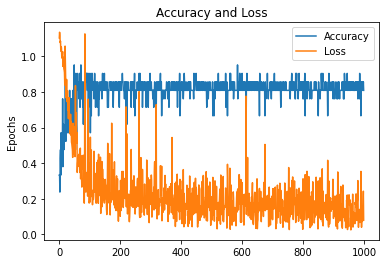

In [34]:
import matplotlib.pyplot as plt

plt.plot()
plt.plot(arr_epochs, arr_accuracy, label = "Accuracy")
plt.ylabel('Epochs')
plt.plot(arr_epochs, arr_loss, label = "Loss")
plt.title('Accuracy and Loss')
plt.legend()
plt.show()

### Part d 
Evaluate the model on the test dataset. Print out the accuracy. Does this accuracy agrees with the training accuracy showed on the plot? Why may they be different?

In [19]:
network.eval()

pred = torch.argmax(network(torch.tensor(X_test)), dim=1).numpy()

print("Accuracy: ", np.sum(pred == y_test)/len(y_test))

Accuracy:  0.9047619047619048



In this case the accuracy and the graph agree, however the accuracy changed a lot though each epoch. Although when we set the epochs to 1000 we can we can see that the loss and the accuracy both appraoch a certian value. The variation in acucracy through each iteration is attributable to **** office hours !!!

## Problem 2

If you haven't done so already, please read Chapter 2 (on fairness) of the textbook.

### Part a

Import the 'semi_synthetic.csv' dataset. This dataset is a modified version of the UCI Credit card dataset (details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)). We added a new synthetic feature to this dataset called `LIMIT_BAL`. It is highly predictive for `SEX==2` but not at all for `SEX==1`. As it turns out, this causes issues with fairness where models rely too much on `LIMIT_BAL` and discriminate against `SEX==2`. We will try to mitigate this in terms of the fairness criterion 'Statistical Parity' as it's mentioned in the textbook.

In [39]:
import pandas as pd
data = pd.read_csv('semi_synthetic.csv')

Extract features from the dataset (all columns except last) and call it `X`. Extract last column and call it `Y`. Also extract the `SEX` column and call this `SF` (for sensitive feature). Split all of these arrays data into train and test sets. You can use `sklearn.model_selection.train_test_split` and 20% ratio for the test dataset. Pass `stratify=Y` to `train_test_split` if you're using it. This ensures that both test and train datasets have the same ratio of 0/1 labels.

In [40]:
from sklearn.model_selection import train_test_split 
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)

X = data.iloc[:,:-1]
SF = X['SEX']
#X_new = X.drop(columns=['SEX'])
y = data.iloc[:,-1]
X_train_SF, X_test_SF, y_train_SF, y_test_SF = train_test_split(SF, y, test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


Use a random forest classifier (whichever hyperparameters you want, you may leave it default) and train it using the train dataset (only `X_train` and `Y_train`. We will not use `SF_train` yet.)

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)


### Part b

Now we will consider the 'statistical parity' fairness metric on the test dataset. This basically means we compare the selection rates (i.e. predicted labels being 1) conditioned on sex and look at their difference/ratio. To do this, print 5 things: 

1. Overall selection rate (what percent is predicted as 1)
2. Selection rate for `SEX==1`
3. Selection rate for `SEX==2`
4. Difference between 2. and 3.
5. Ratio of 2. and 3.

Note that we didn't use anything related to how accurate the model is.

In [42]:
over_all = predict[predict == 1]
selection_rate = (over_all.size)/(predict.size)
print ("Overall Selection Rate: ", selection_rate)

ones = predict[(predict == 1) & (X_test['SEX']==1)]
selection_rate_1 = (ones.size)/(predict.size)
print ("Selection rate for Sex == 1: ", selection_rate_1)

twos = predict[(predict == 1) & (X_test['SEX']==2)]
selection_rate_2 = (twos.size)/(predict.size)
print ("Selection rate for Sex == 2: ", selection_rate_2)

print ("Sex two is selected ",(selection_rate_2 - selection_rate_1), "percentage points more often then sex one")

print("For every individual of Sex 1 selected, ", (selection_rate_2 /(selection_rate_1), "of Sex two are selected")


SyntaxError: unexpected EOF while parsing (<ipython-input-42-afdfbad4ae14>, line 15)

There is a new Python package called `fairlearn` that aims to help machine learning researchers use fairness techniques more easily. Go ahead and download this package (`pip install fairlearn` or `conda install fairlearn`). Note: the authors of `fairlearn` call 'statistical parity' from the textbook as 'demographic parity'.

We will use `selection_rate`, `demographic_parity_difference`, `demographic_parity_ratio` from `fairlearn.metrics` to calculate 1., 4. and 5. above. The way to use these functions is: first argument `Y_test`, second argument `Y_prediction`, and for `demographic_parity_difference` and `demographic_parity_ratio` you need to give a keyword argument for the 'sensitive feature' by `sensitive_features=SF_test`.

Use these three functions and confirm your earlier calculations for 1., 4. and 5.

In [43]:
from fairlearn.metrics import selection_rate, demographic_parity_difference, demographic_parity_ratio

print ("Selection rate:", selection_rate( y_test, predict))
print ("Demographic Parity Difference: ", demographic_parity_difference(y_test, predict, sensitive_features=X_test["SEX"]))
print ("Demographic Parity Ratio: ",demographic_parity_ratio(y_test, predict, sensitive_features=X_test["SEX"]))





Selection rate: 0.05333333333333334
Demographic Parity Difference:  0.022290114917205832
Demographic Parity Ratio:  0.6419650291423813


### Part c
### Mitigating Unfairness with Giving Weights to Datapoints

Now we are going to use the `GridSearch` function from `fairlearn.reductions` to try to mitigate this statistical parity discrepancy. This is one of the many ways to achieve this. What this function does is it gives higher weights to certain datapoints (determined by the sensitive feature) in order to change what the model learns. It automatically uses grid search to determine which weight should be given to `SEX==1` datapoints vs `SEX==2` datapoints (if you're interested you can read the source code). While it is called grid search, the space it searches is 1-dimensional. For our purposes, `GridSearch` takes four arguments: 

1. The model you defined above. This is a non-keyword argument.
2. Constraint. This needs to be an object defined by `fairlearn`, the class we will be using is `fairlearn.reductions.DemographicParity`. It corresponds to minimizing the difference in selection rates (4. from above). This is a non-keyword argument.
3. (Keyword argument) `grid_limit`. This determines the boundaries of the grid search. Basically, the `GridSearch` function will search the interval \[-`grid_limit`,`grid_limit`\] to find the weights. Choose this to be 0.8.
3. (Keyword argument) `grid_size`. This determines how many points there will be in the grid search. Choose this to be 21.

Just like `sklearn.model_selection.GridSearchCV` we have seen in HW1, `fairlearn.reductions.GridSearch` is also a wrapper, so you need to call `.fit()` on this wrapper (not the model directly). Training should be done in less than 5 minutes. In the end this wrapper will contain `grid_size` many models, each corresponding to a different weight for datapoints.

In [ ]:
from fairlearn.reductions import GridSearch, DemographicParity


The `GridSearch` wrapper object you trained has a field called `predictors_`. This gives a list of all the models trained in this grid search, which will be of size `grid_size`.

In [ ]:
predictions_sweep = [predictor.predict(X_test) for predictor in gridsearch_wrapper.predictors_] 
accuracy_sweep = [predictor.score(X_test, Y_test) for predictor in gridsearch_wrapper.predictors_] 

Notice that `predictions_sweep` is a 21 element list. Each of these elements is a numpy array that contains the predictions (`Y_pred`) for `X_test` for that particular model. Use `demographic_parity_difference` like you did above to find the difference in selection rates for each of these models and store these 'fairness metrics' in a numpy array (it too will be size 21).

In [ ]:
from sklearn.metrics import accuracy_score


Plot the accuracy vs difference in selection rates for all these models in a scatter plot.

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.show()

### Part d 

Now calculate the *pareto front*: go over each (accuracy, difference in selection rates) pair and compare it to every other pair. If you find the first pair to have lower accuracy and higher difference in selection rate, discard it.

* Plot the accuracy vs difference in selection rates for all the models the grid search in a scatter plot.
* On the same plot, plot the accuracy vs difference in selection rates for the points on the pareto front. Make these points red.

In [ ]:
plt.figure()

plt.legend()
plt.show()

Which one of these models would you choose to use? Why?

## Problem 3

This problem builds on ideas from paper 2a in Module 1: “Against prediction: Sentencing, Policing, And Punishing In An Actuarial Age,” Chicago Public Law And Legal Theory Working Paper No. 94, Harcourt, 2005. 

Suppose we have two groups $A$ and $B$ of population sizes $n$ and $9n$. We find that under equal surveillance, group $A$’s offending rate is $2$ offenses per month per person and that of group $B$ is $1$ offense per person per month (See Figure on page 17 of the above paper). Equal surveillance means that out of a total of $10m$ monitors, $m$ monitors are assigned to group $A$ and $9m$ monitors are assigned to group $B$. The surveillance is $\frac{m}{n}$ per capita for both groups. So, under equal surveillance, the combined offending rate over both groups is $11n$ per month. 

Suppose we want to bring down the overall offending rate by increasing the monitors for group $A$. In order to do that we collected some data and found that we could model the rate of decrease in offenses for group $A$ by a function as follows:
	If we increase the per capita surveillance from $\frac{m}{n}$ to $\frac{m}{n} (1 + \delta_A)$, the offending rate declines to $2e^{- \alpha \delta_A}$. ($\alpha>0$)

Similarly, we modeled the rate of increase in offenses for group $B$ by a function under reduced surveillance as follows:
	If we decrease the per capita monitoring rate from $\frac{m}{n}$ to $\frac{m}{n} (1 - \delta_B)$, the offending rate rises to $e^{ \beta \delta_B}$. ($\beta>0$)

How would you distribute the monitors so that 

**a)** Both groups had the same offending rate?

**b)** The combined offending rate was minimized?


Consider 3 different scenarios when $\alpha > \beta$, $\alpha = \beta$, and $\alpha < \beta$. 

**c)** For each of the scenarios, which of the above solutions would you prefer and why?

**TIPS**:
- For **part a** and **part b**, answer by calculating $\delta_A$ and $\delta_B$.
- Try to set up equations from the given information. This problem mostly consists of algebra.
- If you do it correctly, **part c** should makes sense immediately.
